<a href="https://colab.research.google.com/github/NDsasuke/Classification-Regression-Clustering/blob/main/Regression/Predicting_Student_Scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

Preprocessing

In [7]:
# Load the data (you need to download the data and adjust the path accordingly)
data = pd.read_csv('student-mat.csv', sep=';')  # Assuming you're using the Math course data (student-mat.csv)

# Map yes/no fields to integer
for column in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    data[column] = data[column].map({'yes': 1, 'no': 0})

# Convert categorical fields to category type
for column in ['Mjob', 'Fjob', 'reason', 'guardian']:
    data[column] = data[column].astype('category')

# Convert category to numerical values
data = pd.get_dummies(data, drop_first=True)

# Define the features and the target
X = data.drop('G3', axis=1)
y = data['G3']

# Split the data into a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Building

In [8]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the testing set
predictions = model.predict(X_test)

# Print the mean squared error of the model
print(f"Mean Squared Error: {mean_squared_error(y_test, predictions)}")


Mean Squared Error: 5.656642833231222


Analyzing

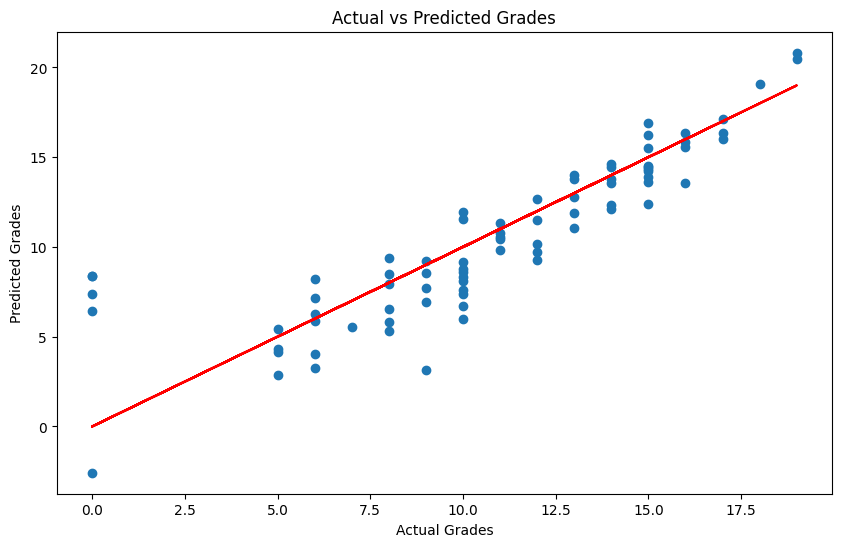

In [9]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, color='red')
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs Predicted Grades")
plt.show()

Visualize the correlation between features:

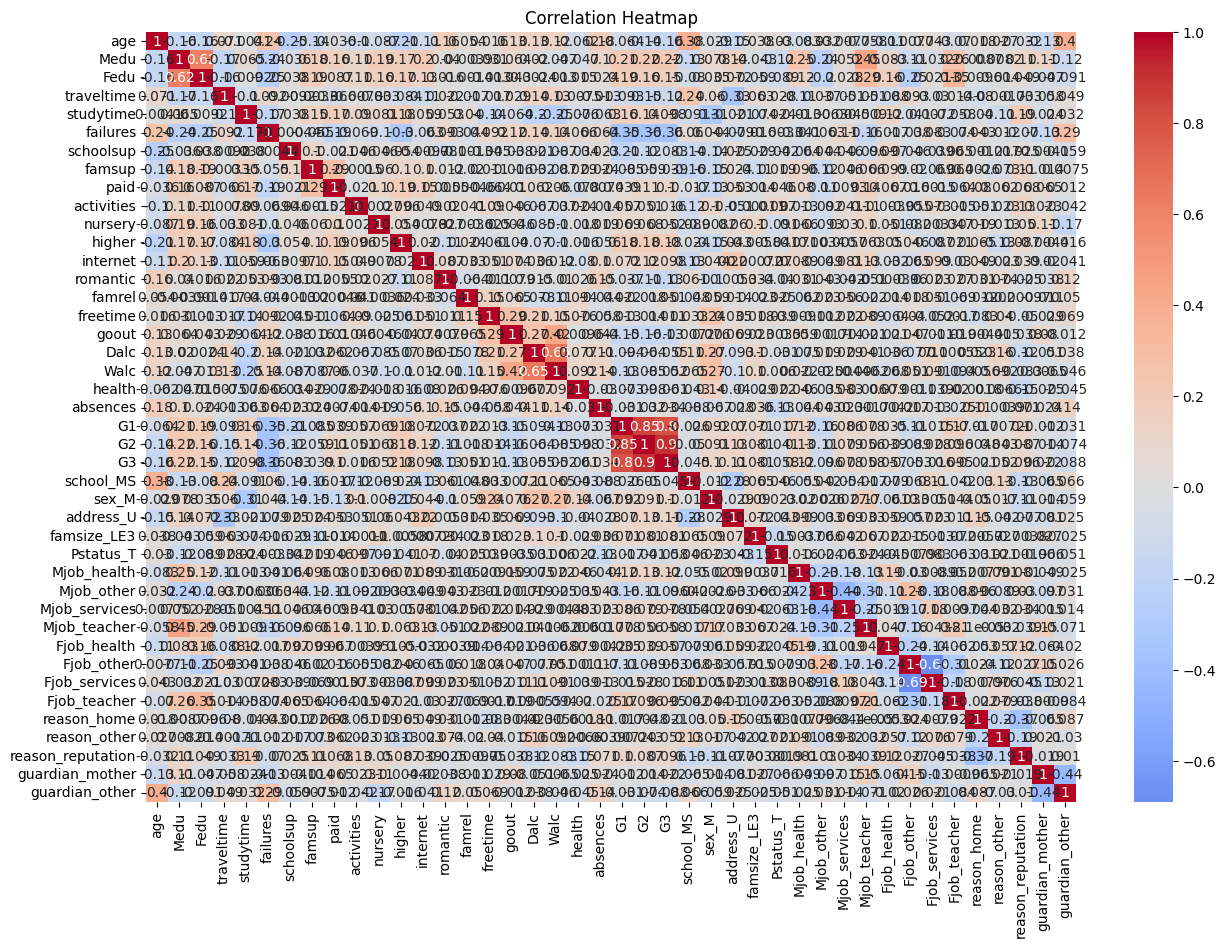

In [10]:
# Plot a correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


 Visualize the distribution of the target variable:

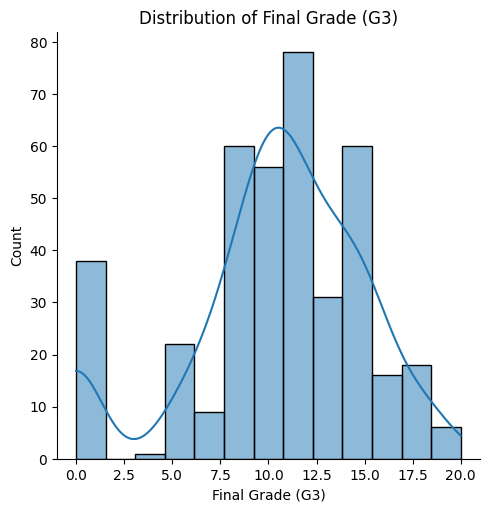

In [11]:
# Plot the distribution of the target variable 'G3'
sns.displot(data['G3'], kde=True)
plt.title('Distribution of Final Grade (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Count')
plt.show()


View the regression model's coefficients:

In [12]:
# View the coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                   Coefficient
age                  -0.115927
Medu                  0.086317
Fedu                 -0.167378
traveltime            0.088593
studytime            -0.007743
failures             -0.285781
schoolsup             0.785652
famsup                0.203656
paid                  0.067222
activities           -0.517500
nursery              -0.236861
higher                0.375377
internet             -0.168204
romantic             -0.390353
famrel                0.314962
freetime             -0.020226
goout                 0.189859
Dalc                 -0.185509
Walc                  0.053906
health                0.044027
absences              0.055593
G1                    0.211699
G2                    0.957772
school_MS             0.093814
sex_M                 0.374410
address_U             0.082612
famsize_LE3          -0.008772
Pstatus_T            -0.140394
Mjob_health          -0.463244
Mjob_other           -0.237195
Mjob_services        -0.051643
Mjob_tea

Compare the actual values with the predicted values:

In [13]:
# Compare actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(df.head(10))


     Actual  Predicted
78       10   6.001607
371      12  11.528478
248       5   2.866437
55       10   8.796631
390       9   8.553106
223      13  11.889641
42       18  19.096742
234       6   7.173079
316       0   7.405071
116      14  12.311537


Evaluate the model with other metrics:

In [14]:
# Import additional metrics
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate and print additional metrics
print(f"Mean Absolute Error: {mean_absolute_error(y_test, predictions)}")
print(f"R^2 Score: {r2_score(y_test, predictions)}")


Mean Absolute Error: 1.6466656197147511
R^2 Score: 0.7241341236974022
